# Distributional Gauss curvature
This is the first of several notebooks to present how to compute (distributional) curvature quantities from a Regge metric $g_h$, i.e. a discretization of a smooth metric $g$ tensor by Regge finite elements. We start with the Gauss curvature for a two-dimensional Riemannian manifold. Although this setting is easiest, it highlights the remaining curvature quantities' strategies and methods. Thus, we will describe the components and ideas in detail. We will show how to define and approximate the Gauss curvature of a two-dimensional Riemannian manifold, where its exact metric $g$ is discretized by a Regge metric $g_h$. Its analysis is postponed to [here](distributional_gauss_curvature_analysis.ipynb). The notebook is based on the following works: [Gawlik. *High-Order Approximation of Gaussian Curvature with Regge Finite Elements*, *SIAM Journal on Numerical Analysis* (2020).](https://doi.org/10.1137/19M1255549), [Berchenko-Kogan, Gawlik. *Finite Element Approximation of the Levi-Civita Connection and Its Curvature in Two Dimensions*, *Found Comput Math* (2022)](https://doi.org/10.1007/s10208-022-09597-1), and [Gopalakrishnan, Neunteufel, Schöberl, Wardetzky. *Analysis of curvature approximations via covariant curl and incompatibility for Regge metrics*, *The SMAI Journal of computational mathematics* (2023).](https://doi.org/10.5802/smai-jcm.98).

## Gauss curvature as a nonlinear distribution
The Gauss curvature $K$ can be expressed in coordinates from the Riemann curvature tensor $\mathfrak{R}$ by
\begin{align*}
K = \mathfrak{R}_{1221}/\det g = \frac{1}{\det g}\left(\partial_1 \Gamma_{221}-\partial_2 \Gamma_{121} + \Gamma_{12}^p\Gamma_{21p}- \Gamma_{22}^p\Gamma_{11p} \right).
\end{align*}
Noting that the Christoffel symbols involve the first derivatives of the metric
\begin{align*}
\Gamma_{ijk}=\frac{1}{2}(\partial_i g_{jk}+\partial_j g_{ik}-\partial_k g_{ij}),\qquad \Gamma_{ij}^k=g^{kl}\Gamma_{ijl},
\end{align*}
we see that the Gauss curvature is a nonlinear (quasi-linear)  second-order differential operator of the metric. As discussed in the [introduction of the Regge metrics](regge_metric.ipynb), these finite elements are solely tangential-tangential continuous. Therefore, derivatives have to be understood in the sense of distributions. However, distributions are classically only available for linear differential operators, not nonlinear ones!

Nevertheless, we can motivate and define a ``nonlinear distributional Gauss curvature'' and apply rigorous numerical analysis to prove convergence. The two main ingredients are the Gauss-Bonnet theorem and an integral representation of the (distributional) Gauss curvature.

## Gauss-Bonnet theorem 
The Gauss-Bonnet theorem introduced and discussed in [this notebook](gauss_bonnet.ipynb) also holds for two-dimensional Riemannian manifolds. To this end, let $(M,g)$ be a two-dimensional Riemannian manifold with a piecewise smooth boundary. Then, the Gauss-Bonnet theorem reads
\begin{align*}
\int_M K\,\omega + \int_{\partial M}\kappa_g\,\omega_{\partial M} + \sum_{V\in \mathcal{V}}(\pi-\varepsilon_V) = \chi(M),
\end{align*}
where $\omega$ is the volume form of $M$ (with coordinate expression $\omega=\sqrt{\det g}\,dx^1\wedge dx^2$), $\omega_{\partial M}$ the volume form on the boundary, and $\chi(M)$ denotes the Euler-characteristic of $M$. Further, $\mathcal{V}$ denotes the set of all corner points at the boundary and $\varepsilon_V$ the jump angle, which measures the angle from the incoming tangent vector to the outgoing tangent vector. 


The geodesic curvature measures how ``curved'' the boundary is within the manifold (i.e. intrinsically). Its definition and coordinate expression is
\begin{align*}
\kappa_g = g(\nabla_tt,n)=-g(\nabla_tn,t)=-\Gamma_{ij}^k t^it^jn_k,
\end{align*}
where
\begin{align*}
t^i = \frac{1}{\sqrt{g(\tau,\tau)}}\tau^i,\qquad n^i = \frac{1}{\sqrt{g^{-1}(\nu,\nu)}}g^{ij}\nu_j
\end{align*}
are the unit tangent and normal vector with respect to the metric $g$ (and $\tau$, $\nu$ the Euclidean versions). Note that there exists a different sign convention on how to define the geodesic curvature. Further, it depends on the direction of the normal vector, which also may lead to a different sign.

For a triangle, we have the following version of Gauss-Bonnet
\begin{align*}
\int_T K\,\omega + \int_{\partial T}\kappa_g\,\omega_{\partial T} + \sum_{i=1}^3(\pi-\varepsilon_i) = 2\pi.
\end{align*}

If the metric $g_h$ would be globally smooth on the triangulation $\mathcal{T}$ of $M$, then the geodesic curvature computed at an internal edge $E$ with respect to the adjacent two triangles would coincide up to a sign due to the jump of the normal vector. Thus, the jump of the geodesic curvature would be zero, $[\![\kappa_g]\!]_E=0$. However, as the Regge metric is only $tt$-continuous, the jump of the geodesic curvature won't vanish in general. The same argument can be made at the triangulation's internal vertices $V\in\mathcal{V}$. For a smooth metric, computing the sum of the inner angles of adjacent triangles with respect to the metric would always give $2\pi$, $\sphericalangle_V:=\sum_{T\supset V}\sphericalangle_V^T(g)-2\pi=0$. Here, $\sphericalangle_V^T(g):=\arccos(t_1,t_2)$ measures the internal angle with respect to the metric $g$, where $t_1$ and $t_2$ are the two unit tangent vectors starting at $V$ and going in the direction of the edges attached to $V$ on the element $T$. However, again, for a Regge metric, the sum won't be $2\pi$ in general. This motivates us to define the distributional Gauss curvature by
$$
\begin{align*}
\widetilde{K\,\omega} := \sum_{T\in\mathcal{T}}K|_T\,\omega|_T+\sum_{E\in\mathcal{E}}[\![\kappa_g]\!]\,\omega_E\,\delta_E+\sum_{V\in\mathcal{V}}\sphericalangle_V\,\delta_V,
\end{align*}
$$
Here, $\delta_E$ and $\delta_V$ are the Dirac deltas with respect to the edge $E$ and vertex $V$, respectively. Note that we always have the volume forms involved in the expression. Therefore, strictly speaking, it is the distributional densitized Gauss curvature [Christiansen. *Exact formulas for the approximation of connections and curvature*, *arXiv* (2013).](http://arxiv.org/abs/1307.3376). Further, the volume form on the edges $\omega_E$, which reads in coordinates
\begin{align*}
\omega_E = \sqrt{g(\tau_E,\tau_E)}
\end{align*}
is single-valued for Regge metrics because of the $tt$-continuity. The vertex term in the above expression of the distributional Gauss curvature is well-known in discrete differential geometry as the angle defect (or angle deficit). It is used, for example, to approximate the Gauss curvature of an affine surface (or, equivalently, a Riemannian manifold for piecewise constant metric tensor). Therefore, the above formula extends this well-known concept of discrete differential geometry to higher-order metric approximations. 
Applied to a sufficiently smooth test function $\varphi$ it reads
$$
\begin{align*}
\widetilde{K\,\omega}(\varphi) = \sum_{T\in\mathcal{T}}\int_TK|_T\,\varphi\,\omega|_T+\sum_{E\in\mathcal{E}}\int_E[\![\kappa_g]\!]\,\varphi\,\omega_E+\sum_{V\in\mathcal{V}}\sphericalangle_V\,\varphi(V).
\end{align*}
$$
In its current form, numerical analysis is not feasible; the terms are all highly nonlinear with respect to the metric. In the [following notebook](distributional_gauss_curvature_analysis.ipynb), we will see that the distributional Gauss curvature has an integral representation, which opens the door for rigorous analysis.

## Lifted Gauss curvature approximation
Nevertheless, we can use the above expression for computations. We compute a discrete $L^2$-Riesz representative of the distribution to visualise the approximated Gauss curvature. We note that Lagrange finite elements are suitable test functions for the distributional Gauss curvature, as they allow for point evaluation at the vertices. Thus, we define the lifted Gauss curvature $K_h$ as the solution of the following problem: Let $g_h\in\mathrm{Reg}^k$ be given as well as $K^D$ on the Dirichlet boundary $\Gamma_D$ and the geodesic curvature $\kappa(g)^N$ and external angle $\sphericalangle_V^N(g)$ on the Neumann boundary $\Gamma_N$. Find $K_h\in \mathrm{Lag}^{k+1}$ such that $K_h=K$ on $\Gamma_D$ and for all $u_h\in \mathrm{Lag}^{k+1}_{\Gamma_D}$
$$
\begin{align*}
\int_M K_h\,u_h\,\omega = \widetilde{K\,\omega}(u_h) - \int_{\Gamma_N}\kappa(g)^Nu_h-\sum_{V\in\mathcal{V}\cap\Gamma_N}\sphericalangle_V^N(g)u_h(V).
\end{align*}
$$
Here, we split the boundary into a Dirichlet part, where the exact Gauss curvature can be prescribed and a Neumann part, where the exact geodesic curvature and, at the non-smooth points, the external angle must be given.

## Numerical example
In the following example, we compute the lifted Gauss curvature $K_h$ on a sequence of meshes and compute the $L^2$ and $H^{-1}$ error. We split the boundary into two Dirichlet and two Neumann ones. 

In [1]:
from ngsolve import *
from ngsolve.webgui import Draw
from ngsolve.meshes import MakeStructured2DMesh
from netgen.occ import unit_square

import random as random
from ngsolve.krylovspace import CGSolver

left = 0
right = 1
top = 1
bottom = 0
# Dirichlet data on bottom and right boundary, Neumann on top and left boundary
dirichlet = "right|bottom"


def mapping(x, y):
    return (left + (right - left) * x, bottom + (top - bottom) * y)


mesh = MakeStructured2DMesh(quads=False, nx=8, ny=8, mapping=mapping)

# exact metric tensor
Gex = CF(
    (
        1 + (x - 1 / 3 * x**3) ** 2,
        (x - 1 / 3 * x**3) * (y - 1 / 3 * y**3),
        (x - 1 / 3 * x**3) * (y - 1 / 3 * y**3),
        1 + (y - 1 / 3 * y**3) ** 2,
    ),
    dims=(2, 2),
)
# exact Gauss curvature
K_ex = (
    81
    * (1 - x**2)
    * (1 - y**2)
    / (9 + x**2 * (x**2 - 3) ** 2 + y**2 * (y**2 - 3) ** 2) ** 2
)
Draw(K_ex, mesh, "K", order=3)

# exact Christoffel symbol of second kind
chr2ex = CF(
    (
        (3 * x**5 - 12 * x**3 + 9 * x)
        / (x**6 - 6 * x**4 + 9 * x**2 + y**6 - 6 * y**4 + 9 * y**2 + 9),
        3
        * (x**2 - 1)
        * (y**2 - 3)
        * y
        / (x**6 - 6 * x**4 + 9 * x**2 + y**6 - 6 * y**4 + 9 * y**2 + 9),
        0,
        0,
        0,
        0,
        3
        * (y**2 - 1)
        * (x**2 - 3)
        * x
        / (x**6 - 6 * x**4 + 9 * x**2 + y**6 - 6 * y**4 + 9 * y**2 + 9),
        3
        * (y**2 - 1)
        * (y**2 - 3)
        * y
        / (x**6 - 6 * x**4 + 9 * x**2 + y**6 - 6 * y**4 + 9 * y**2 + 9),
    ),
    dims=(2, 2, 2),
)

We compute the $H^{-1}$-norm of the error $\|K_h-K\|_{H^{-1}}$ by solving the following problem. Find $u_h\in \mathrm{Lag}^{k+3}_0$ such that for all $v_h\in \mathrm{Lag}^{k+3}_0$
$$
\begin{align*}
\int_{M}\nabla u_h\cdot\nabla v_h = \langle K_h-K,v_h\rangle_{H^{-1}\times H_0^1}.
\end{align*}
$$
Then its $H^1$-norm is equivalent to the $H^{-1}$-norm of the error, $\|u_h\|_{H^1}\approx \|K_h-K\|_{H^{-1}}$. To mitigate approximation errors that spoil the convergence, we use two polynomial degrees more than for $K_h$ to compute $u_h$. We use a BDDC preconditioner in combination with static condensation and a CGSolver to solve the problem iteratively.

In [2]:
def CompHm1Norm(rhs, order):
    fesH = H1(mesh, order=order, dirichlet=".*")
    u, v = fesH.TnT()

    a = BilinearForm(
        Grad(u) * Grad(v) * dx, symmetric=True, symmetric_storage=True, condense=True
    )
    f = LinearForm(rhs * v * dx).Assemble()

    apre = Preconditioner(a, "bddc")
    a.Assemble()
    invS = CGSolver(a.mat, apre.mat, printrates="\r", maxiter=400)
    ext = IdentityMatrix() + a.harmonic_extension
    inv = a.inner_solve + ext @ invS @ ext.T

    gfu = GridFunction(fesH)
    gfu.vec.data = inv * f.vec

    err = sqrt(Integrate(gfu**2 + Grad(gfu) ** 2, mesh))
    return err

The following function computes the lifted approximated Gauss curvature for a given metric and polynomial order. Further, with the argument ``canonical_interpolation'' we can specify if a local $L^2$ best-approximation should approximate the metric tensor $g$ by setting it to False or using the canonical Regge interpolant by setting it to True. It turns out that the latter improves the convergence rate by one. We discuss this behavior in more detail in the [following notebook](distributional_gauss_curvature_analysis.ipynb).

In [3]:
# we use the convention that the normal vector points inward the triangles
# note that these are unit vectors and orthogonal w.r.t. Euclidean metric
t = specialcf.tangential(2)
n = -specialcf.normal(2)


# utility function to compute the angle between two tangential vectors
# at a vertex with respect to a given metric G
def TrigAngle(G):
    # the two tangent vectors starting at a vertex V
    # and pointing to the two adjacent edges of the triangle
    bbnd_tang = specialcf.VertexTangentialVectors(2)
    bbnd_tang1 = bbnd_tang[:, 0]
    bbnd_tang2 = bbnd_tang[:, 1]
    return acos(
        G[bbnd_tang1, bbnd_tang2]
        / sqrt(G[bbnd_tang1, bbnd_tang1])
        / sqrt(G[bbnd_tang2, bbnd_tang2])
    )


# main function to compute the Gauss curvature
def ComputeGaussCurvature(mesh, Gex, order, canonical_interpolation=False):
    fesCC = HCurlCurl(mesh, order=order)
    gf_G = GridFunction(fesCC)
    gf_G.Set(Gex, dual=canonical_interpolation, bonus_intorder=5)

    # indicator functions for boundary vertices and edges
    ind_V = GridFunction(H1(mesh, order=1))
    ind_V.Set(1, definedon=mesh.Boundaries(".*"))
    ind_E = GridFunction(FacetFESpace(mesh, order=0))
    ind_E.Set(1, definedon=mesh.Boundaries(".*"))

    fesH = H1(mesh, order=order + 1, dirichlet=dirichlet)
    u, v = fesH.TnT()

    # (simplified) coordinate expressions of the terms of the distributional Gauss curvature
    vol_term = 1 / sqrt(Det(gf_G)) * gf_G.Operator("curvature")
    bnd_term = sqrt(Det(gf_G)) / gf_G[t, t] * gf_G.Operator("christoffel2")[t, t, n]
    bbnd_term = TrigAngle(Id(2)) - TrigAngle(gf_G)

    f = LinearForm(fesH)
    # angle deficit
    f += v * bbnd_term * dx(element_vb=BBND)
    # jump of geodesic curvature
    f += v * bnd_term * dx(element_boundary=True)
    # Gauss curvature
    f += v * vol_term * dx

    # Neumann data
    f += -ind_V * v * (TrigAngle(Id(2)) - TrigAngle(Gex)) * dx(element_vb=BBND)
    f += (
        -ind_E
        * v
        * sqrt(Gex[t, t])
        * sqrt(Det(Gex))
        / sqrt(Gex[t, t]) ** 3
        * chr2ex[t, t, n]
        * dx(element_boundary=True)
    )

    # lifted Gauss curvature
    gf_K = GridFunction(fesH)

    # mass matrix to compute discrete L2 Riesz representative
    M = BilinearForm(
        sqrt(Det(gf_G)) * u * v * dx,
        symmetric=True,
        symmetric_storage=True,
        condense=True,
    )
    Mpre = Preconditioner(M, "bddc")
    M.Assemble()
    f.Assemble()

    # Dirichlet data
    gf_K.Set(K_ex, definedon=mesh.Boundaries(dirichlet), dual=True)

    r = gf_K.vec.CreateVector()

    M.Apply(gf_K.vec, r)
    r.data -= f.vec

    invS = CGSolver(M.mat, Mpre.mat, printrates="\r", maxiter=400)
    ext = IdentityMatrix() + M.harmonic_extension
    inv = M.inner_solve + ext @ invS @ ext.T
    gf_K.vec.data -= inv * r

    # uncomment to draw the lifted Gauss curvature
    Draw(gf_K, mesh, "K", min=0, max=1, deformation=True)

    err_l2 = sqrt(Integrate((gf_K - K_ex) ** 2, mesh))
    err_hm1 = CompHm1Norm(gf_K - K_ex, order=order + 3)

    return (err_l2, err_hm1, fesH.ndof)

To avoid possible super-convergence due to symmetries in the mesh, we perturb the internal vertices by a random noise.

In [4]:
def GeneratePerturbedMesh(i):
    eps = 1e-8
    ngmesh = unit_square.GenerateMesh(maxh=1 / 2**i)
    for pnts in ngmesh.Points():
        px, py = pnts[0], pnts[1]
        # perturb internal mesh points
        if all(
            [
                abs(mapping(px, py)[0] - left) > eps,
                abs(mapping(px, py)[0] - right) > eps,
                abs(mapping(px, py)[1] - bottom) > eps,
                abs(mapping(px, py)[1] - top) > eps,
            ]
        ):
            px += random.uniform(-1 / 2 ** (i + 2), 1 / 2 ** (i + 2))
            py += random.uniform(-1 / 2 ** (i + 2), 1 / 2 ** (i + 2))
        pnts[0] = mapping(px, py)[0]
        pnts[1] = mapping(px, py)[1]
    ngmesh.Update()
    return Mesh(ngmesh)

Compute the Gauss curvature approximation on a sequence of meshes. You can play around with the polynomial order and whether or not the canonical Regge interpolant should be used. The $L^2$, $H^{-1}$ errors, and the number of degrees of freedom are stored.

In [5]:
err_hm1 = []
err_l2 = []
ndof = []

# order of metric approximation >= 0
order = 1
# whether to use canonical Regge interpolation for the metric
canonical_interpolation = False

with TaskManager():
    for i in range(7):
        print(f"i = {i}")
        mesh = GeneratePerturbedMesh(i)

        errl, errm1, dof = ComputeGaussCurvature(
            mesh, Gex, order=order, canonical_interpolation=canonical_interpolation
        )
        err_l2.append(errl)
        err_hm1.append(errm1)
        ndof.append(dof)

i = 0
CG converged in 3 iterations to residual 1.708073018815039e-17
CG converged in 2 iterations to residual 2.204795059378995e-18
i = 1
CG converged in 7 iterations to residual 3.873191263346619e-20
CG converged in 11 iterations to residual 2.1824989682311593e-15
i = 2
CG converged in 14 iterations to residual 4.648873960148553e-13
CG converged in 28 iterations to residual 1.4968061411735373e-14
i = 3
CG converged in 15 iterations to residual 1.6034926656065638e-13
CG converged in 31 iterations to residual 7.542393960229984e-15
i = 4
CG converged in 15 iterations to residual 1.9118712781301866e-13
CG converged in 35 iterations to residual 2.6054573145819657e-15
i = 5


CG converged in 15 iterations to residual 1.559654672859669e-13
CG converged in 36 iterations to residual 9.100013448079042e-16
i = 6


CG converged in 15 iterations to residual 1.389576902719649e-13
CG converged in 37 iterations to residual 9.469424811803674e-16


Plot the results together with reference lines for linear, quadratic, and cubic convergence order.

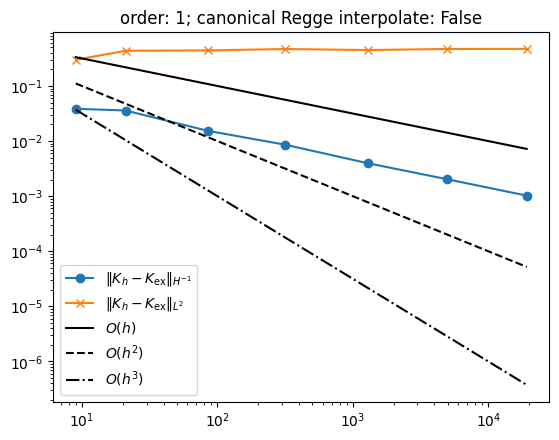

In [6]:
import matplotlib.pyplot as plt

plt.plot(ndof, err_hm1, "-o", label=r"$\|K_h-K_{\mathrm{ex}}\|_{H^{-1}}$")
plt.plot(ndof, err_l2, "-x", label=r"$\|K_h-K_{\mathrm{ex}}\|_{L^2}$")
plt.plot(ndof, [dof ** (-1 / 2) for dof in ndof], "-", color="k", label="$O(h)$")
plt.plot(ndof, [dof ** (-2 / 2) for dof in ndof], "--", color="k", label="$O(h^2)$")
plt.plot(ndof, [dof ** (-3 / 2) for dof in ndof], "-.", color="k", label="$O(h^3)$")

plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.title(f"order: {order}; canonical Regge interpolate: {canonical_interpolation}")
plt.show()

Observations: If we don't use the canonical Regge interpolant to approximate the metric tensor $g$, we have the following convergence rates for a polynomial order $k\in \{0,1,2,\dots\}$
$$
\begin{align*}
\|K_h-K\|_{L^2}\le C h^{k-1},\qquad \|K_h-K\|_{H^{-1}}\le C h^{k}.
\end{align*}
$$
For the canonical Regge interpolant, the convergence rates improve by one
$$
\begin{align*}
\|K_h-K\|_{L^2}\le C h^{k},\qquad \|K_h-K\|_{H^{-1}}\le C h^{k+1}.
\end{align*}
$$
These convergence rates can be rigorously [proven](distributional_gauss_curvature_analysis.ipynb).

Remark: Reducing the polynomial approximation for the lifted Gauss curvature $K_h$ from $k+1$ to $k$, i.e. the same order as the Regge metric, one additional order of convergence is obtained if the canonical Regge interpolant is used. Further, we need to assume that $k\ge 1$ (as there are no order zero Lagrange elements). We refer to  [Gopalakrishnan, Neunteufel, Schöberl, Wardetzky. *On the improved convergence of lifted distributional Gauss curvature from Regge elements*, *Results in Applied Mathematics* (2024).](https://doi.org/10.1016/j.rinam.2024.100511) for details.